# Time Series Clustering

## Assignment F
**Goal:** Illustrate clustering of timeseries data using pretrained models or specialized libraries.

**Dataset:** [UCR Time Series Classification Archive](https://paperswithcode.com/dataset/ucr-time-series-classification-archive) (We use the 'Trace' dataset available in `tslearn` for ease of access, which is part of UCR archive).

In [1]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.7/372.7 kB 11.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

# Set random seed
np.random.seed(17)

## 1. Load and Prepare Data
We load the 'Trace' dataset. It contains synthetic instrumentation data.

In [3]:
train_X, y_train, test_X, y_test = CachedDatasets().load_dataset("Trace")
X = np.concatenate((train_X, test_X))
y = np.concatenate((y_train, y_test))

# Standardize the time series
X_scaled = TimeSeriesScalerMeanVariance().fit_transform(X)

print(f"Data shape: {X_scaled.shape}")

Data shape: (200, 275, 1)


## 2. Time Series K-Means (DTW)
We use K-Means with Dynamic Time Warping (DTW) as the distance metric, which is standard for time series clustering.

In [4]:
model = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=10, random_state=17)
y_pred = model.fit_predict(X_scaled)

## 3. Visual Analysis
We visualize the cluster centers (barycenters) and the assigned time series.

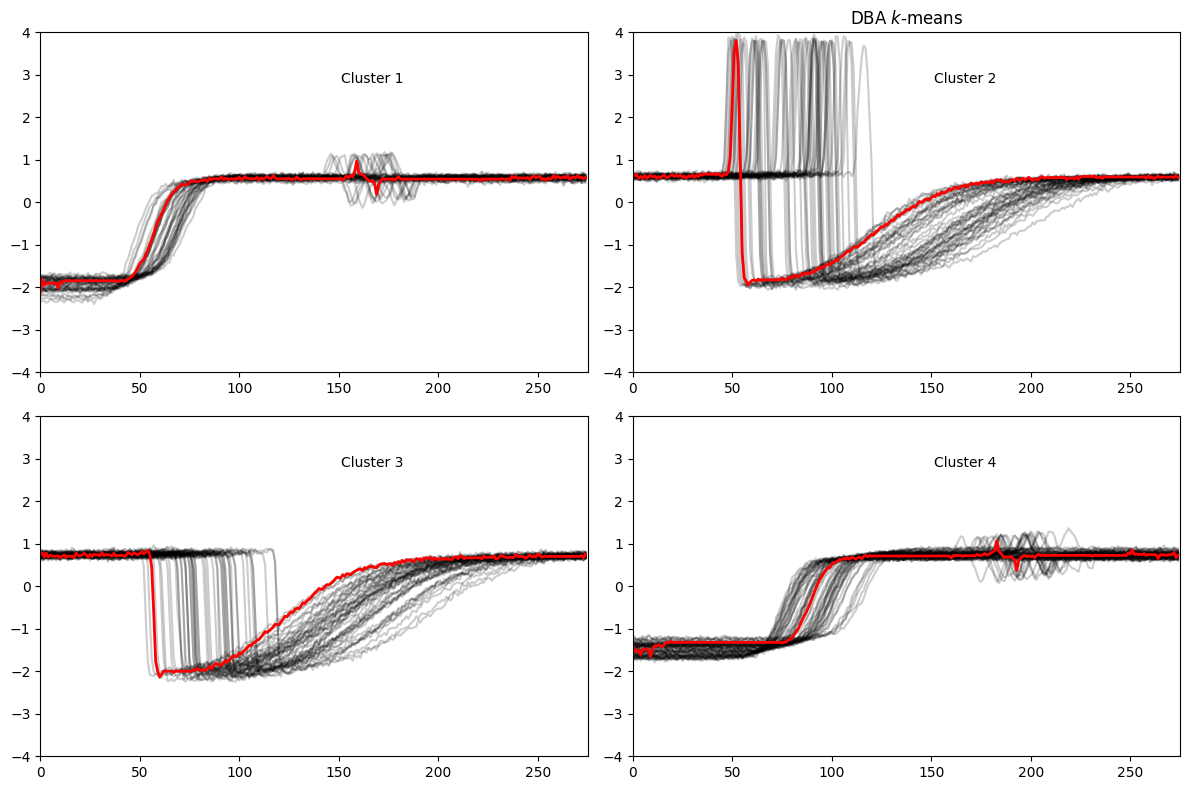

In [5]:
plt.figure(figsize=(12, 8))
for yi in range(4):
    plt.subplot(2, 2, yi + 1)
    for xx in X_scaled[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model.cluster_centers_[yi].ravel(), "r-", linewidth=2)
    plt.xlim(0, X_scaled.shape[1])
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

plt.tight_layout()
plt.show()

## 4. Evaluation
Since we have ground truth labels, we can check the purity or Rand Index.

In [6]:
from sklearn.metrics import adjusted_rand_score

score = adjusted_rand_score(y, y_pred)
print(f"Adjusted Rand Index: {score:.4f}")

Adjusted Rand Index: 0.6645
